In [9]:
# **********************************************************************************************************************
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 1. Tạo DataFrame employees chứa danh sách các nhân viên. Danh sách này được đọc từ tập tin employees.xls
# 2. Xem các thông tin của employees và xem 5 nhân viên đầu tiên.
# **********************************************************************************************************************

df_employee = pd.read_excel('employees.xlsx')
print(df_employee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EMPLOYEE_ID     107 non-null    int64  
 1   FIRST_NAME      107 non-null    object 
 2   LAST_NAME       107 non-null    object 
 3   EMAIL           107 non-null    object 
 4   PHONE_NUMBER    107 non-null    object 
 5   HIRE_DATE       107 non-null    object 
 6   JOB_ID          107 non-null    object 
 7   SALARY          107 non-null    int64  
 8   COMMISSION_PCT  35 non-null     float64
 9   MANAGER_ID      106 non-null    float64
 10  DEPARTMENT_ID   106 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 9.3+ KB
None


In [11]:
df_employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17 00:00:00,AD_PRES,24000,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21 00:00:00,AD_VP,17000,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13 00:00:00,AD_VP,17000,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03 00:00:00,IT_PROG,9000,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21 00:00:00,IT_PROG,6000,NaN,103.0,60.0


In [12]:
# 3. Tạo các DataFrame departments chứa danh sách các nhân viên và jobs chứa danh sách các công việc. Các danh sách này được đọc từ các tập tin departments.xls và job.xls
# **********************************************************************************************************************
df_dep = pd.read_excel('departments.xlsx')
df_jobs = pd.read_excel('jobs.xlsx')
print(df_dep.head())
print('=======================================================')
print(df_jobs.head())

   DEPARTMENT_ID  DEPARTMENT_NAME  MANAGER_ID  LOCATION_ID
0             10   Administration       200.0         1700
1             20        Marketing       201.0         1800
2             30       Purchasing       114.0         1700
3             40  Human Resources       203.0         2400
4             50         Shipping       121.0         1500
       JOB_ID                      JOB_TITLE  MIN_SALARY  MAX_SALARY
0  AC_ACCOUNT              Public Accountant        4200        9000
1      AC_MGR             Accounting Manager        8200       16000
2     AD_ASST       Administration Assistant        3000        6000
3     AD_PRES                      President       20080       40000
4       AD_VP  Administration Vice President       15000       30000


In [13]:
# 4. Tạo DataFrame emp là danh sách các nhân viên của DataFrame employees chỉ với các cột theo mẫu sau:
# ***
emp = pd.DataFrame(df_employee, columns = ['EMPLOYEE_ID','FIRST_NAME','LAST_NAME','HIRE_DATE','SALARY','DEPARTMENT_ID','JOB_ID'])
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP
3,103,Alexander,Hunold,2006-01-03 00:00:00,9000,60.0,IT_PROG
4,104,Bruce,Ernst,2007-05-21 00:00:00,6000,60.0,IT_PROG


In [14]:
# 5. Trong DataFrame emp hãy thêm vào hai cột: DEPARTMENT_NAME (tên phòng) và JOB_TITLE (tên công việc) theo mẫu:
# **********************************************************************************************************************
emp = pd.merge(emp, df_dep[['DEPARTMENT_ID','DEPARTMENT_NAME']] , how="left")
emp = pd.merge(emp, df_jobs[['JOB_ID','JOB_TITLE']],  how="left")
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President
1,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
2,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
3,103,Alexander,Hunold,2006-01-03 00:00:00,9000,60.0,IT_PROG,IT,Programmer
4,104,Bruce,Ernst,2007-05-21 00:00:00,6000,60.0,IT_PROG,IT,Programmer


In [15]:
# 6.Liệt kê các nhân viên của các phòng 50 và 90, sắp giảm theo department_id và tăng theo salary.

emp[(emp['DEPARTMENT_ID']==90) | (emp['DEPARTMENT_ID']==50)].sort_values(by=['DEPARTMENT_ID','SALARY'], ascending=[False,True]).set_index('EMPLOYEE_ID').head()

,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
EMPLOYEE_ID,,,,,,,,
101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President
132,TJ,Olson,2007-04-10 00:00:00,2100,50.0,ST_CLERK,Shipping,Stock Clerk
128,Steven,Markle,2008-03-08 00:00:00,2200,50.0,ST_CLERK,Shipping,Stock Clerk


In [16]:
# 7.Liệt kê các nhân viên của phòng có department_name là Sales và có salary>=5000 và salary<=7000

emp[(emp['DEPARTMENT_NAME']=='Sales') & (emp['SALARY']>=5000) & (emp['SALARY']<=7000)].head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
55,155,Oliver,Tuvault,2007-11-23 00:00:00,7000,80.0,SA_REP,Sales,Sales Representative
61,161,Sarath,Sewall,2006-11-03 00:00:00,7000,80.0,SA_REP,Sales,Sales Representative
65,165,David,Lee,2008-02-23 00:00:00,6800,80.0,SA_REP,Sales,Sales Representative
66,166,Sundar,Ande,2008-03-24 00:00:00,6400,80.0,SA_REP,Sales,Sales Representative
67,167,Amit,Banda,2008-04-21 00:00:00,6200,80.0,SA_REP,Sales,Sales Representative


In [17]:
# 8 Cho biết phòng nào có tổng lương lớn nhất

emp_8 = emp.groupby(['DEPARTMENT_ID','DEPARTMENT_NAME'])['SALARY'].sum().reset_index()
emp_8[emp_8['SALARY'] == emp_8['SALARY'].max()]


,DEPARTMENT_ID,DEPARTMENT_NAME,SALARY
7,80.0,Sales,304500


In [18]:
# 9 Cho biết nhân viên không thuộc phòng ban nào cả

emp[emp['DEPARTMENT_NAME'].isnull()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
78,178,Kimberely,Grant,2007-05-24 00:00:00,7000,NaN,SA_REP,NaN,Sales Representative


In [19]:
# 10 In thông tin thống kê của salary

emp['SALARY'].describe()

count      107.000000
mean      6461.831776
std       3909.579731
min       2100.000000
25%       3100.000000
50%       6200.000000
75%       8900.000000
max      24000.000000
Name: SALARY, dtype: float64

In [20]:
# 11 Liệt kê các nhân viên có lương (salary) > trung bình các lương, sắp tăng theo department_name và sắp giảm theo salary

emp[emp['SALARY'] > emp['SALARY'].mean()].sort_values(by=['DEPARTMENT_NAME','SALARY'], ascending=[True,False]).reset_index(drop=True).head(10)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
0,205,Shelley,Higgins,2002-06-07 00:00:00,12008,110.0,AC_MGR,Accounting,Accounting Manager
1,206,William,Gietz,2002-06-07 00:00:00,8300,110.0,AC_ACCOUNT,Accounting,Public Accountant
2,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President
3,101,Neena,Kochhar,2005-09-21 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
4,102,Lex,De Haan,2001-01-13 00:00:00,17000,90.0,AD_VP,Executive,Administration Vice President
5,108,Nancy,Greenberg,2002-08-17 00:00:00,12008,100.0,FI_MGR,Finance,Finance Manager
6,109,Daniel,Faviet,2002-08-16 00:00:00,9000,100.0,FI_ACCOUNT,Finance,Accountant
7,110,John,Chen,2005-09-28 00:00:00,8200,100.0,FI_ACCOUNT,Finance,Accountant
8,112,Jose Manuel,Urman,2006-03-07 00:00:00,7800,100.0,FI_ACCOUNT,Finance,Accountant
9,111,Ismael,Sciarra,2005-09-30 00:00:00,7700,100.0,FI_ACCOUNT,Finance,Accountant


In [21]:
# 12 Cho biết nhân viên có lương lớn nhất, nhân viên có lương nhỏ nhất
emp[emp['SALARY'] == emp['SALARY'].max()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
0,100,Steven,King,2003-06-17 00:00:00,24000,90.0,AD_PRES,Executive,President


In [22]:
emp[emp['SALARY'] == emp['SALARY'].min()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,HIRE_DATE,SALARY,DEPARTMENT_ID,JOB_ID,DEPARTMENT_NAME,JOB_TITLE
32,132,TJ,Olson,2007-04-10 00:00:00,2100,50.0,ST_CLERK,Shipping,Stock Clerk


In [23]:
# 13 Cho biết các nhân viên có lương lớn nhất của mỗi phòng, sắp tăng theo department_id:
# 13_sol1 - use transform
emp_13 = emp.groupby(['DEPARTMENT_ID'])['SALARY'].transform(max) == emp['SALARY']
emp[emp_13][['DEPARTMENT_ID','EMPLOYEE_ID','FIRST_NAME','SALARY']].set_index('DEPARTMENT_ID').sort_values(by=['DEPARTMENT_ID'], ascending=[True])


,EMPLOYEE_ID,FIRST_NAME,SALARY
DEPARTMENT_ID,,,
10.0,200,Jennifer,4400
20.0,201,Michael,13000
30.0,114,Den,11000
40.0,203,Susan,6500
50.0,121,Adam,8200
60.0,103,Alexander,9000
70.0,204,Hermann,10000
80.0,145,John,14000
90.0,100,Steven,24000


In [24]:
# 13_sol2 - create temp max colomn

emp_13b_gr = emp.groupby(['DEPARTMENT_ID']).agg({'SALARY':'max'}).rename(columns={'SALARY':'SALARY_MAX'})
emp_13b = pd.merge(emp, emp_13b_gr, how = 'left', on = ['DEPARTMENT_ID'])
emp_13b = emp_13b[emp_13b['SALARY'] == emp_13b['SALARY_MAX']]
emp_13b[['DEPARTMENT_ID','EMPLOYEE_ID','FIRST_NAME','SALARY']].set_index('DEPARTMENT_ID').sort_values(by=['DEPARTMENT_ID'], ascending=[True])


,EMPLOYEE_ID,FIRST_NAME,SALARY
DEPARTMENT_ID,,,
10.0,200,Jennifer,4400
20.0,201,Michael,13000
30.0,114,Den,11000
40.0,203,Susan,6500
50.0,121,Adam,8200
60.0,103,Alexander,9000
70.0,204,Hermann,10000
80.0,145,John,14000
90.0,100,Steven,24000


In [25]:
# 14 Tạo cột BONUS có giá trị là SALARY + 500 và in ra 5 nhân viên đầu tiên theo mẫu:
# **********************************************************************************************************************

emp['BONUS'] = emp['SALARY']+500
emp[['EMPLOYEE_ID','FIRST_NAME','SALARY','BONUS']].head()

,EMPLOYEE_ID,FIRST_NAME,SALARY,BONUS
0,100,Steven,24000,24500
1,101,Neena,17000,17500
2,102,Lex,17000,17500
3,103,Alexander,9000,9500
4,104,Bruce,6000,6500


In [26]:
# 15 Tạo cột NAM_VAO_LAM là năm vào làm (trích năm từ cột HIRE_DATE). Xóa cột HIRE_DATE
# **********************************************************************************************************************

emp['NAM_VAO_LAM'] = pd.DatetimeIndex(emp['HIRE_DATE']).year
del emp['HIRE_DATE']
emp[['EMPLOYEE_ID','FIRST_NAME','NAM_VAO_LAM']].head()

,EMPLOYEE_ID,FIRST_NAME,NAM_VAO_LAM
0,100,Steven,2003
1,101,Neena,2005
2,102,Lex,2001
3,103,Alexander,2006
4,104,Bruce,2007


In [27]:
# 16 Thống kê theo mẫu:

emp.groupby(['DEPARTMENT_NAME'])['SALARY'].agg(['count','max','min','mean','sum']).reset_index()

,DEPARTMENT_NAME,count,max,min,mean,sum
0,Accounting,2,12008,8300,10154.000000,20308
1,Administration,1,4400,4400,4400.000000,4400
2,Executive,3,24000,17000,19333.333333,58000
3,Finance,6,12008,6900,8601.333333,51608
4,Human Resources,1,6500,6500,6500.000000,6500
5,IT,5,9000,4200,5760.000000,28800
6,Marketing,2,13000,6000,9500.000000,19000
7,Public Relations,1,10000,10000,10000.000000,10000
8,Purchasing,6,11000,2500,4150.000000,24900
9,Sales,34,14000,6100,8955.882353,304500


In [28]:
# 17 Thống kê theo mẫu:

emp.groupby(['NAM_VAO_LAM'])['NAM_VAO_LAM'].agg(['count']).sort_values(by=['count'], ascending=[False]).reset_index()


,NAM_VAO_LAM,count
0,2005,29
1,2006,24
2,2007,19
3,2008,11
4,2004,10
5,2002,7
6,2003,6
7,2001,1


In [29]:
# 18 Thống kê theo mẫu:

emp.groupby(['DEPARTMENT_NAME', 'JOB_TITLE'])['JOB_TITLE'].agg(['count']).sort_values(by=['DEPARTMENT_NAME', 'JOB_TITLE'], ascending=[True,True]).reset_index().head(11)

,DEPARTMENT_NAME,JOB_TITLE,count
0,Accounting,Accounting Manager,1
1,Accounting,Public Accountant,1
2,Administration,Administration Assistant,1
3,Executive,Administration Vice President,2
4,Executive,President,1
5,Finance,Accountant,5
6,Finance,Finance Manager,1
7,Human Resources,Human Resources Representative,1
8,IT,Programmer,5
9,Marketing,Marketing Manager,1


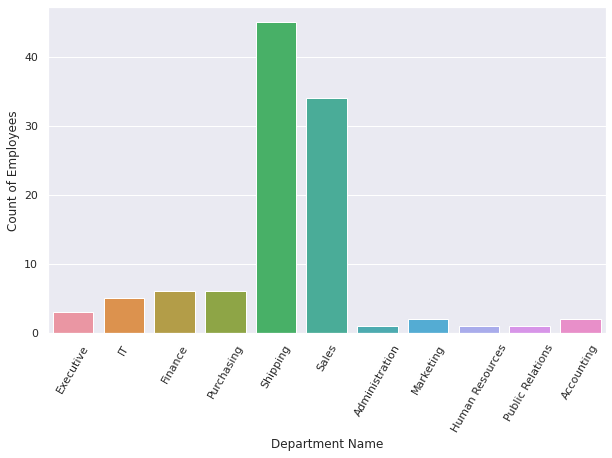

In [30]:
# 19 Vẽ biểu đồ theo mẫu sau: (đếm số nhân viên theo phòng)

sns.set()
plt.figure(figsize=(10,6))
sns.countplot(data=emp, x='DEPARTMENT_NAME')
plt.xlabel("Department Name")
plt.ylabel("Count of Employees")
plt.xticks(rotation=60)
plt.show()

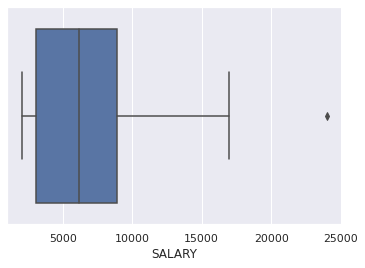

In [31]:
# 20 Vẽ biểu đồ theo mẫu sau: vẽ lương các nhân viên toàn công ty

sns.boxplot(data=emp, x='SALARY')
plt.show()

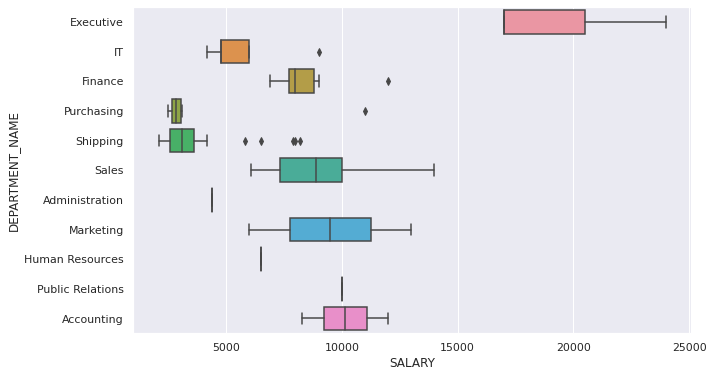

In [32]:
# 21 Vẽ biểu đồ theo mẫu sau: vẽ lương các nhân viên theo mỗi phòng

plt.figure(figsize=(10,6))
sns.boxplot(data=emp, x='SALARY', y = 'DEPARTMENT_NAME')
plt.show()

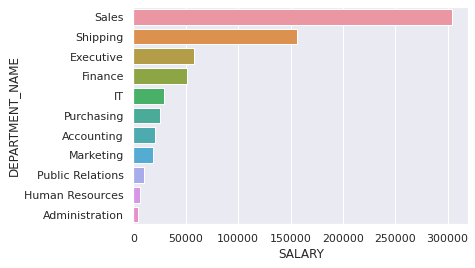

In [33]:
# 22 Vẽ biểu đồ theo mẫu sau: vẽ tổng lương theo mỗi phòng
emp_22 = emp.groupby(['DEPARTMENT_NAME'])['SALARY'].agg(['sum']).rename(columns={'sum':'SALARY'}).reset_index()
plt.xlabel("Department Name")
sns.barplot(data=emp_22.sort_values(by='SALARY', ascending=False), y='DEPARTMENT_NAME', x='SALARY', orient="h");

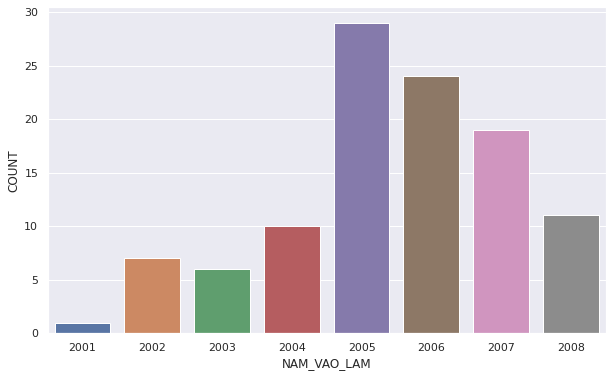

In [34]:
# 23 Vẽ biểu đồ theo mẫu sau: vẽ số nhân viên vào làm theo năm

sns.set()
plt.figure(figsize=(10,6))
sns.countplot(data=emp, x='NAM_VAO_LAM')
plt.ylabel("COUNT")
plt.show()

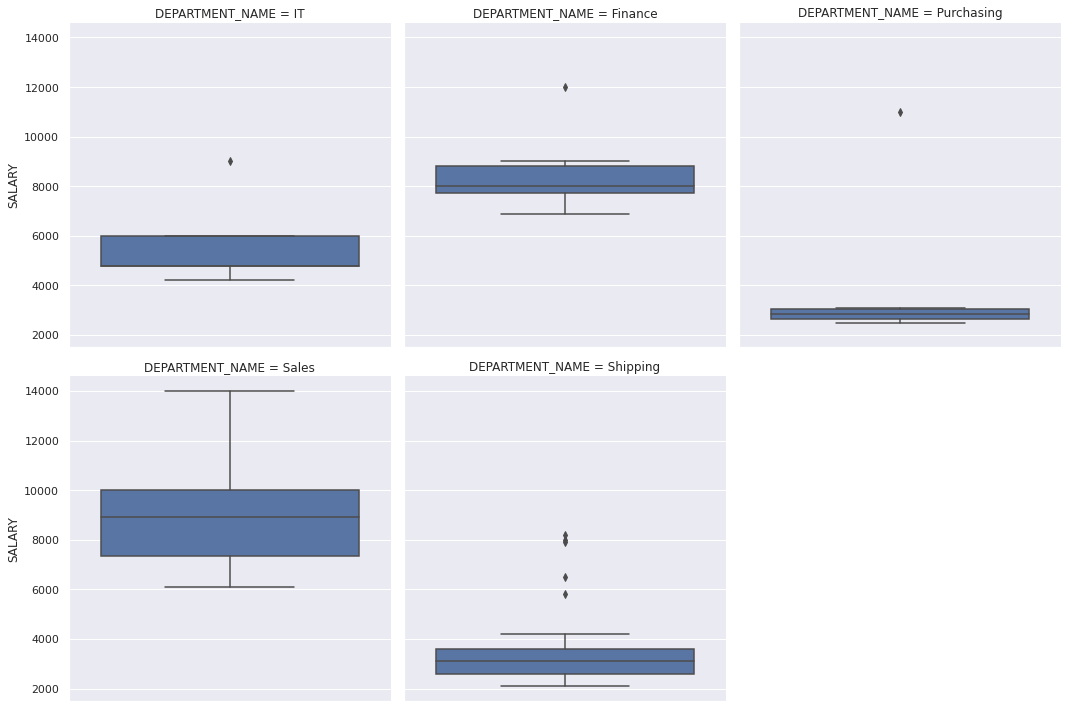

In [35]:
# 24 Vẽ biểu đồ theo mẫu sau: top 5 theo số nhân viên của mỗi phòng

e24 = emp.DEPARTMENT_NAME.value_counts().iloc[:5].sort_values(ascending = True) 
sns.catplot(data=emp, kind='box', y='SALARY', col='DEPARTMENT_NAME', col_order = e24.index, col_wrap = 3);
